# This Notebook shows the basic usage and functionalities of metaKEGG.

In [53]:
import pandas as pd
import metaKEGG
import os
import time

In [54]:
times = []
times_dict = {}

### Gene Expression

In [55]:
# This function takes a single input file as an argument and maps the detected genes on the enriched KEGG reference pathway, and colors them according to their log2FC values.

In [56]:
# Define parameters
input_file_path = "./single_input_genes.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
count_threshold = 2
pathway_pvalue_threshold = None
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [57]:
pre_instance = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps,
                                folder_extension=folder_extension)

In [58]:
# Intialize the object

start = time.perf_counter()
my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps,
                                folder_extension=folder_extension)

# Run the pipeline
my_pipeline.gene_expression(benjamini_threshold=benjamini_threshold,
                            count_threshold=count_threshold,
                            pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_genes = round(end - start - 0.5 , 3)
times.append(time_genes)
times_dict['gene_expression'] = time_genes
print(f"Execution time: {time_genes} seconds")

Executing analysis: Gene expression...

Will create folder : .\draw_KEGG_2025-12-15_genes
The contents of '.\draw_KEGG_2025-12-15_genes' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_genes

Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)

Done! 
Output files are located in .\draw_KEGG_2025-12-15_genes
Execution time: 7.643 seconds


In [59]:
time.sleep(2)

### Transcript expression

In [60]:
# This function takes a single input file as an argument and maps the detected transcripts on the enriched KEGG reference pathway, and colors them according to their log2FC values.

# NOTE: Pathway enrichement analysis with the DAVID Functional Annotation Tool, should be performed using transcript IDs.

In [61]:
# Inspect the file

TRANSCRIPTS_PATHWAYS_FILE_PATH = "./single_input_transcripts.xlsx"
PATHWAYS_SHEET_NAME = "pathways"
TRANSCRIPTS_SHEET_NAME = "transcript_metrics"


In [62]:
transcript_metrics_df = pd.read_excel(TRANSCRIPTS_PATHWAYS_FILE_PATH , sheet_name=TRANSCRIPTS_SHEET_NAME)
transcript_metrics_df.head()

,ID,gene_symbol,logFC
0,ENSMUST00000000001,Il6,0.448476
1,ENSMUST00000000002,Il6,2.070121
2,ENSMUST00000000003,Il6ra,2.558087
3,ENSMUST00000000004,Il6ra,1.532812
4,ENSMUST00000000005,Socs3,2.645260


In [63]:
transcript_metrics_df['gene_symbol'].value_counts().head()

gene_symbol
Itch      5
Cycs      4
Fas       4
Srebf1    3
Nfkb1     3
Name: count, dtype: int64

In [64]:
# Define parameters
input_file_path = "./single_input_transcripts.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "transcript_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
count_threshold = 2
pathway_pvalue_threshold = None
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [65]:
# Intialize the object
start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps,
                                folder_extension=folder_extension)

# Run the pipeline
my_pipeline.transcript_expression(benjamini_threshold=benjamini_threshold,
                                  count_threshold=count_threshold,
                                  pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_transcripts = round(end - start - 0.5 , 3)
times.append(time_transcripts)
times_dict['transcript_expression'] = time_transcripts
print(f"Execution time: {time_transcripts} seconds")

Executing analysis: Transcript expression...

Will create folder : .\draw_KEGG_2025-12-15_transcripts
The contents of '.\draw_KEGG_2025-12-15_transcripts' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_transcripts

Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_transcripts
Execution time: 7.88 seconds


In [66]:
time.sleep(2)

### Bulk RNAseq mapping

In [67]:
# This function takes RANseq data, as single input file argument, maps the genes on a provided list of target pathways (assuming they are also found in the target pathways), and colors them according to their log2FC values.

In [68]:
# Define parameters
input_file_path = "./single_input_bulk.xlsx"
genes_column = "gene_symbol"
log2fc_column = "logFC"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
save_to_eps = False
folder_extension = None

In [69]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column = genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps)
# Run the pipeline
my_pipeline.bulk_rnaseq_mapping()

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_bulk = round(end - start - 0.5 , 3)
times.append(time_bulk)
times_dict['bulk_rnaseq_mapping'] = time_bulk
print(f"Execution time: {time_bulk} seconds")

Executing analysis : Bulk RNAseq mapping...

Will create folder : .\draw_KEGG_2025-12-15_bulk
The contents of '.\draw_KEGG_2025-12-15_bulk' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_bulk
Parsing input file...

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_bulk
Execution time: 7.926 seconds


In [70]:
time.sleep(2)

### Multiple inputs

In [71]:
# This function takes a list of inputs file as an argument and only maps pathways that are found in all of the inputs files.
# For a common pathway, it will generate all possible states for a gene, from each individual input, to all possible combinations and assignes a unique color code to each combination.
#     The detected genes are mapped enriched KEGG reference pathway, based on the state they're in.

In [72]:
# Input files list
input_file_path = ["./single_input_genes.xlsx",
                   "./multiple_inputs_1.xlsx",
                   "./multiple_inputs_2.xlsx"]

# Define parameters
input_label = ["input1" , "input2" , "input3"]
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
count_threshold = 2
pathway_pvalue_threshold = None
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [73]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps)

# Run the pipeline
my_pipeline.multiple_inputs(input_label=input_label, # Label list for each input file
                            count_threshold=count_threshold,
                            benjamini_threshold=benjamini_threshold,
                            pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_multiple = round(end - start - 0.5 , 3)
times.append(time_multiple)
times_dict['multiple_inputs'] = time_multiple
print(f"Execution time: {time_multiple} seconds")

Executing analysis : Multiple inputs...

Will create folder : .\draw_KEGG_2025-12-15_3_inputs
The contents of '.\draw_KEGG_2025-12-15_3_inputs' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_3_inputs

You want to map 3 inputs in total.
Parsing input file...

File Counter: 1, File: ./single_input_genes.xlsx, with name input1

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

File Counter: 2, File: ./multiple_inputs_1.xlsx, with name input2

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

File Counter: 3, File: ./multiple_inputs_2.xlsx, with name input3

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file


[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Outpu

In [74]:
time.sleep(2)

### Differentially methylated genes

In [75]:
# This function takes a single input file and a methylation metadata file as arguments and maps the detected genes on the enriched KEGG reference pathway, and colors them according to their methylation state.
# The state is defined as a binary reprsentation, depending if DMPs corresponding to a given gene are detected, or not.

In [76]:
# Inspect the metadata file

DMPS_FILE_PATH = "./methylation.csv"

dmps_df = pd.read_csv(DMPS_FILE_PATH)
dmps_df.head()

,CG_ID,methylation_gene_symbol,methylation_pval,methylation_logFC
0,cg_1,Ndufs8,0.049801,1.915612
1,cg_2,Uqcrq,0.013704,-0.818593
2,cg_3,Ndufb4b,0.040040,2.648866
3,cg_4,Cox5a,0.035938,2.818396
4,cg_5,Nr1h3,0.030564,-0.230053


In [77]:
# Define parameters
input_file_path = "./single_input_genes.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
methylation_file_path = "./methylation.csv"
methylation_genes_column = "methylation_gene_symbol"
methylation_pvalue_column = "methylation_pval"
methylation_pvalue_threshold = 0.05
count_threshold = 2
pathway_pvalue_threshold = None
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [78]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps)

# Run the pipeline
my_pipeline.methylated_genes(methylation_file_path=methylation_file_path,
                              methylation_genes_column=methylation_genes_column,
                              methylation_pvalue_column=methylation_pvalue_column,
                              methylation_pvalue_threshold=methylation_pvalue_threshold,
                              count_threshold=count_threshold,
                              benjamini_threshold=benjamini_threshold,
                              pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_methylation = round(end - start - 0.5 , 3)
times.append(time_methylation)
times_dict['methylated_genes'] = time_methylation
print(f"Execution time: {time_methylation} seconds")

Executing analysis : Methylated genes...

Will create folder : .\draw_KEGG_2025-12-15_methylation
The contents of '.\draw_KEGG_2025-12-15_methylation' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_methylation

Opening CSV file: ./methylation.csv
Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_methylation
Execution time: 7.62 seconds


In [79]:
time.sleep(2)

### DMPs per gene

In [80]:
# This function takes a single input file and a methylation metadata file as arguments and maps the detected genes on the enriched KEGG reference pathway.
# It generates bins to quantify the number of DMPs that correspond to a given gene, and colors a gege according to its DMP bin.
# The function also returns the quantification histogram plots, both in a grouped and an absolute count representation.

In [81]:
# Inspect the metadata file

DMPS_PER_GENE_FILE_PATH = "./methylation_for_quantification.csv"

dmps_per_gene_df = pd.read_csv(DMPS_PER_GENE_FILE_PATH)
dmps_per_gene_df.head()

,CG_ID,methylation_gene_symbol,methylation_pval,methylation_logFC
0,cg100_1,Ndufs8,0.049801,1.915612
1,cg100_2,Uqcrq,0.013704,-0.818593
2,cg100_3,Ndufb4b,0.040040,2.648866
3,cg100_4,Cox5a,0.035938,2.818396
4,cg100_5,Nr1h3,0.030564,-0.230053


In [82]:
dmps_per_gene_df['methylation_gene_symbol'].value_counts().head()

methylation_gene_symbol
Ppara      13
Ndufs1     10
Ndufb4b     9
Bax         9
Eif2s1      8
Name: count, dtype: int64

In [83]:
# Define parameters
input_file_path = "./single_input_genes.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
methylation_file_path = "./methylation_for_quantification.csv"
methylation_genes_column = "methylation_gene_symbol"
methylation_pvalue_column = "methylation_pval"
methylation_pvalue_threshold = 0.05
methylation_probe_column = "CG_ID"
probes_to_cgs=False
count_threshold = 2
pathway_pvalue_threshold = None
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [84]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps)

# Run the pipeline
my_pipeline.dmps_per_gene(methylation_file_path=methylation_file_path,
                          methylation_genes_column=methylation_genes_column,
                          methylation_pvalue_column=methylation_pvalue_column,
                          methylation_pvalue_threshold=methylation_pvalue_threshold,
                          methylation_probe_column=methylation_probe_column,
                          probes_to_cgs=probes_to_cgs,
                          count_threshold=count_threshold,
                          benjamini_threshold=benjamini_threshold,
                          pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_methylation_quant = round(end - start - 0.5 , 3)
times.append(time_methylation_quant)
times_dict['dmps_per_gene'] = time_methylation_quant
print(f"Execution time: {time_methylation_quant} seconds")

Executing analysis : DMPs per gene...

Will create folder : .\draw_KEGG_2025-12-15_methylation_quantification
The contents of '.\draw_KEGG_2025-12-15_methylation_quantification' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_methylation_quantification

Opening CSV file: ./methylation_for_quantification.csv
Will not perform probe correction...

Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_methylation_quantification
Execution time: 8.094 seconds


In [85]:
time.sleep(2)

#### Probe correction

In [86]:
# NOTE: When using probes_to_cgs=True, the pipeline will split the CG probes by the underscore '_' character and keep the first part, essentially correcting for different probe chemistry that could occur in the same position.

# Example format is cg00000000_BC21 and cg00000000_TC21, which would be counted as two separate probes targeting the same gene.
# Using the argument probes_to_cgs with True, the probes become cg00000000 & cg00000000, and duplicated entries per gene are eliminated, essentially counting one probe for the target gene.

### miRNA target genes

In [87]:
# This function takes a single input file and a miRNA metadata file as arguments and maps the detected genes on the enriched KEGG reference pathway, and colors them according to their miRNA state.
# The state is defined as a binary reprsentation, depending if DEmiRs are targeting a given gene, or not.

In [88]:
DEMIRS_FILE_PATH = "./miRNA.tsv"

demirs_df = pd.read_csv(DEMIRS_FILE_PATH , sep='\t')
demirs_df.head()

,miRNA_ID,miRNA_gene_symbol,miRNA_pval,miRNA_logFC
0,mmu-miR-1-3p,dufb4,0.567302,1.234433
1,mmu-miR-2-3p,Atf4,0.756792,-0.002424
2,mmu-miR-3-3p,Prkag3,0.737903,2.747361
3,mmu-miR-4-3p,Xbp1,0.381659,0.802038
4,mmu-miR-5-3p,Prkag3,0.823298,2.281397


In [89]:
# Define parameters
input_file_path = "./single_input_genes.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
miRNA_file_path = "./miRNA.tsv"
miRNA_genes_column = "miRNA_gene_symbol"
miRNA_pvalue_column = "miRNA_pval"
miRNA_pvalue_threshold=0.05
pathway_pvalue_threshold = None
count_threshold = 2
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [90]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps)

# Run the pipeline
my_pipeline.mirna_target_genes(miRNA_file_path=miRNA_file_path,
                                miRNA_genes_column=miRNA_genes_column,
                                miRNA_pvalue_column=miRNA_pvalue_column,
                                miRNA_pvalue_threshold=miRNA_pvalue_threshold,
                                count_threshold=count_threshold,
                                benjamini_threshold=benjamini_threshold,
                                pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_miRNA = round(end - start - 0.5 , 3)
times.append(time_miRNA)
times_dict['miRNA_target_genes'] = time_miRNA
print(f"Execution time: {time_miRNA} seconds")

Executing analysis : miRNA target genes...

Will create folder : .\draw_KEGG_2025-12-15_miRNA
The contents of '.\draw_KEGG_2025-12-15_miRNA' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_miRNA

Opening TSV file: ./miRNA.tsv
Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_miRNA
Execution time: 7.547 seconds


In [91]:
time.sleep(2)

### DEmiRs per gene

In [92]:
# This function takes a single input file and a miRNA metadata file as arguments and maps the detected genes on the enriched KEGG reference pathway.
# It generates bins to quantify the number of DEmiRs that correspond to a given gene, and colors a gege according to its DEmiR bin.
# The function also returns the quantification histogram plots, both in a grouped and an absolute count representation.

In [93]:
# Inspect the metadata file

DEMIRS_PER_GENE_FILE_PATH = "./miRNA_for_quantification.tsv"

demirs_per_genes_df = pd.read_csv(DEMIRS_FILE_PATH , sep='\t')
demirs_per_genes_df.head()

,miRNA_ID,miRNA_gene_symbol,miRNA_pval,miRNA_logFC
0,mmu-miR-1-3p,dufb4,0.567302,1.234433
1,mmu-miR-2-3p,Atf4,0.756792,-0.002424
2,mmu-miR-3-3p,Prkag3,0.737903,2.747361
3,mmu-miR-4-3p,Xbp1,0.381659,0.802038
4,mmu-miR-5-3p,Prkag3,0.823298,2.281397


In [94]:
demirs_per_genes_df['miRNA_gene_symbol'].value_counts().head()

miRNA_gene_symbol
Prkaa1     2
Cox8c      2
Ndufb8     2
Il1a       2
Bcl2l11    2
Name: count, dtype: int64

In [95]:
# Define parameters

input_file_path = "./single_input_genes.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
miRNA_file_path = "./miRNA_for_quantification.tsv"
miRNA_genes_column = "miRNA_gene_symbol"
miRNA_pvalue_column = "miRNA_pval"
miRNA_pvalue_threshold = 0.05
miRNA_column = "miRNA_ID"
pathway_pvalue_threshold = None
count_threshold = 2
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [96]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                                sheet_name_paths=sheet_name_paths,
                                sheet_name_genes=sheet_name_genes,
                                genes_column=genes_column,
                                log2fc_column=log2fc_column,
                                save_to_eps=save_to_eps)

my_pipeline.demirs_per_gene(miRNA_file_path=miRNA_file_path,
                            miRNA_genes_column=miRNA_genes_column,
                            miRNA_pvalue_column=miRNA_pvalue_column,
                            miRNA_pvalue_threshold=miRNA_pvalue_threshold,
                            miRNA_ID_column=miRNA_column, 
                            count_threshold=count_threshold,
                            benjamini_threshold=benjamini_threshold,
                            pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_miRNA_quant = round(end - start - 0.5 , 3)
times.append(time_miRNA_quant)
times_dict['demirs_per_gene'] = time_miRNA_quant
print(f"Execution time: {time_miRNA_quant} seconds")

Executing analysis : DEmiRs per gene...

Will create folder : .\draw_KEGG_2025-12-15_miRNA_quantification
The contents of '.\draw_KEGG_2025-12-15_miRNA_quantification' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_miRNA_quantification

Opening TSV file: ./miRNA_for_quantification.tsv
Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_miRNA_quantification
Execution time: 8.205 seconds


In [97]:
time.sleep(2)

### Methylated + miRNA target genes

In [98]:
# Define parameters
input_file_path = "./single_input_genes.xlsx"
sheet_name_paths = "pathways"
sheet_name_genes = "gene_metrics"
genes_column = "gene_symbol"
log2fc_column = "logFC"
methylation_file_path = "./methylation.csv"
methylation_genes_column = "methylation_gene_symbol"
methylation_pvalue_column = "methylation_pval"
methylation_pvalue_threshold = 0.05
miRNA_file_path = "./miRNA.tsv"
miRNA_genes_column = "miRNA_gene_symbol"
miRNA_pvalue_column = "miRNA_pval"
miRNA_pvalue_threshold = 0.05
count_threshold = 2
pathway_pvalue_threshold = None
benjamini_threshold = None
save_to_eps = False
folder_extension = None

In [99]:
# Intialize the object

start = time.perf_counter()

my_pipeline = metaKEGG.Pipeline(input_file_path=input_file_path,
                        sheet_name_paths=sheet_name_paths,
                        sheet_name_genes=sheet_name_genes,
                        genes_column=genes_column,
                        log2fc_column=log2fc_column,
                        save_to_eps=save_to_eps)

# Run the pipeline
my_pipeline.methylated_and_mirna_target_genes(methylation_file_path=methylation_file_path,
                                                    methylation_genes_column=methylation_genes_column,
                                                    methylation_pvalue_column=methylation_pvalue_column,
                                                    methylation_pvalue_threshold=methylation_pvalue_threshold,
                                                    miRNA_file_path=miRNA_file_path,
                                                    miRNA_genes_column=miRNA_genes_column,
                                                    miRNA_pvalue_column=miRNA_pvalue_column,
                                                    miRNA_pvalue_threshold=miRNA_pvalue_threshold,
                                                    count_threshold=count_threshold,
                                                    benjamini_threshold=benjamini_threshold,
                                                    pathway_pvalue_threshold=pathway_pvalue_threshold)

end = time.perf_counter()
# Adjusted execution time to account for sleep 0.5 seconds
time_methylation_miRNA = round(end - start - 0.5 , 3)
times.append(time_methylation_miRNA)
times_dict['methylated_and_mirna_target_genes'] = time_methylation_miRNA
print(f"Execution time: {time_methylation_miRNA} seconds")

Executing analysis : Methylated + miRNA target genes...

Will create folder : .\draw_KEGG_2025-12-15_methylation_and_miRNA
The contents of '.\draw_KEGG_2025-12-15_methylation_and_miRNA' have been removed, and the directory has been recreated.
Output folder is .\draw_KEGG_2025-12-15_methylation_and_miRNA

Opening CSV file: ./methylation.csv
Opening TSV file: ./miRNA.tsv
Parsing input file...

Will use thresholds:
Minimum number of genes in pathway : 2 (included)
pathway raw pvalue : None
pathway Benjamini-Hochberg : None

Finished parsing input file

Finished collecting pathway info

Mapping pathways...

[1/1] mmu04932 (Non-alcoholic fatty liver disease)
Done! 
Output files are located in .\draw_KEGG_2025-12-15_methylation_and_miRNA
Execution time: 7.663 seconds


In [100]:
time.sleep(2)

In [101]:
times

[7.643, 7.88, 7.926, 8.083, 7.62, 8.094, 7.547, 8.205, 7.663]

In [102]:
times_dict

{'gene_expression': 7.643,
 'transcript_expression': 7.88,
 'bulk_rnaseq_mapping': 7.926,
 'multiple_inputs': 8.083,
 'methylated_genes': 7.62,
 'dmps_per_gene': 8.094,
 'miRNA_target_genes': 7.547,
 'demirs_per_gene': 8.205,
 'methylated_and_mirna_target_genes': 7.663}

In [ ]:
# {'gene_expression': 7.643,
#  'transcript_expression': 7.88,
#  'bulk_rnaseq_mapping': 7.926,
#  'multiple_inputs': 8.083,
#  'methylated_genes': 7.62,
#  'dmps_per_gene': 8.094,
#  'miRNA_target_genes': 7.547,
#  'demirs_per_gene': 8.205,
#  'methylated_and_mirna_target_genes': 7.663}

{'gene_expression': 7.643,
 'transcript_expression': 7.88,
 'bulk_rnaseq_mapping': 7.926,
 'multiple_inputs': 8.083,
 'methylated_genes': 7.62,
 'dmps_per_gene': 8.094,
 'miRNA_target_genes': 7.547,
 'demirs_per_gene': 8.205,
 'methylated_and_mirna_target_genes': 7.663}

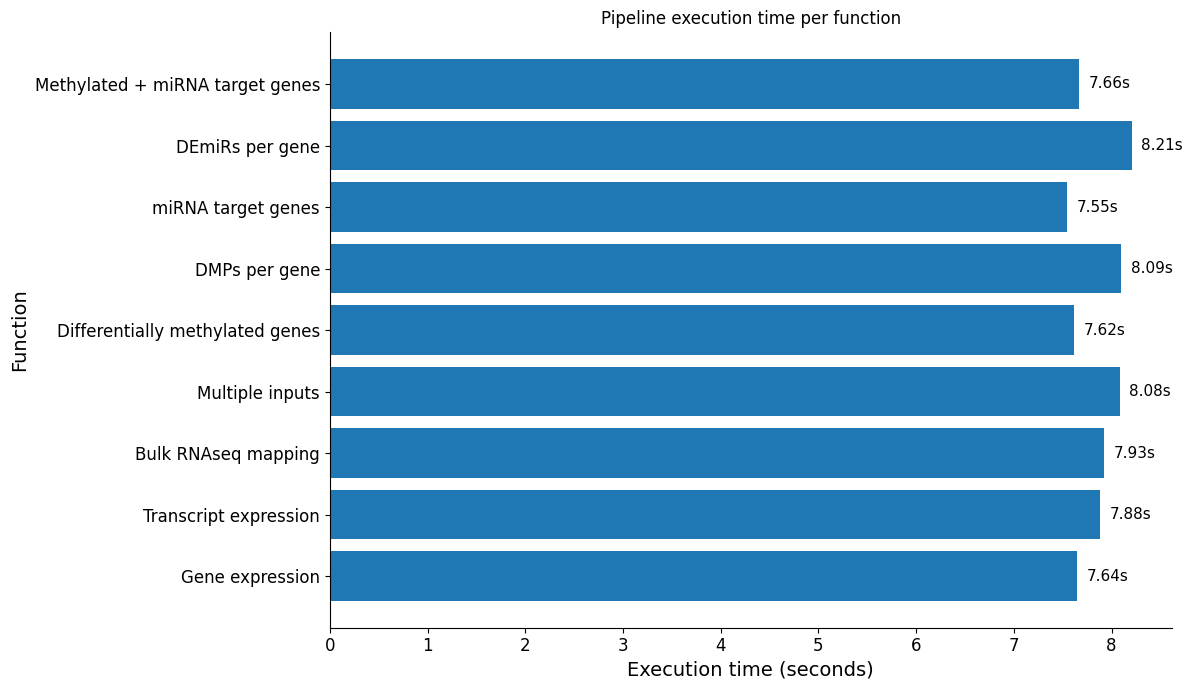

In [ ]:
import matplotlib.pyplot as plt

ordered_keys = [
    'gene_expression',
    'transcript_expression',
    'bulk_rnaseq_mapping',
    'multiple_inputs',
    'methylated_genes',
    'dmps_per_gene',
    'miRNA_target_genes',
    'demirs_per_gene',
    'methylated_and_mirna_target_genes'
]

plot_labels = [
    "Gene expression",
    "Transcript expression",
    "Bulk RNAseq mapping",
    "Multiple inputs",
    "Differentially methylated genes",
    "DMPs per gene",
    "miRNA target genes",
    "DEmiRs per gene",
    "Methylated + miRNA target genes"
]

times = [times_dict[k] for k in ordered_keys]

plt.figure(figsize=(12,7))
bars = plt.barh(plot_labels, times)

plt.xlabel("Execution time (seconds)")
plt.title("Pipeline execution time per function")

for bar in bars:
    x = bar.get_width()
    plt.text(x + 0.1, bar.get_y() + bar.get_height()/2,
             f"{x:.2f}s", va='center' , size=11)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Execution time (seconds)", fontsize=14)
plt.ylabel("Function", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("pipeline_timing.png", dpi=300)
plt.savefig("pipeline_timing.eps")
plt.show()